In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import json
import re
import seaborn as sns
import geopandas as gpd

%matplotlib inline

BLEACHING EVENTS

In [2]:
#Importing world wide bleaching events DF (wbe = world bleaching events)
#Initially imported bleaching events from world and regions, then filtered for world events only.. will come back to regions
wbe = pd.read_csv('coral-bleaching-events.csv')
wbe.columns = ['Entity', 'Code', 'Year', 'Moderate_bleaching', 'Severe_bleaching']
world_events = wbe[wbe['Entity'] == 'World']
world_events.head()

,Entity,Code,Year,Moderate_bleaching,Severe_bleaching
148,World,OWID_WRL,1980,5,0
149,World,OWID_WRL,1981,2,0
150,World,OWID_WRL,1982,1,0
151,World,OWID_WRL,1983,8,14
152,World,OWID_WRL,1984,1,1


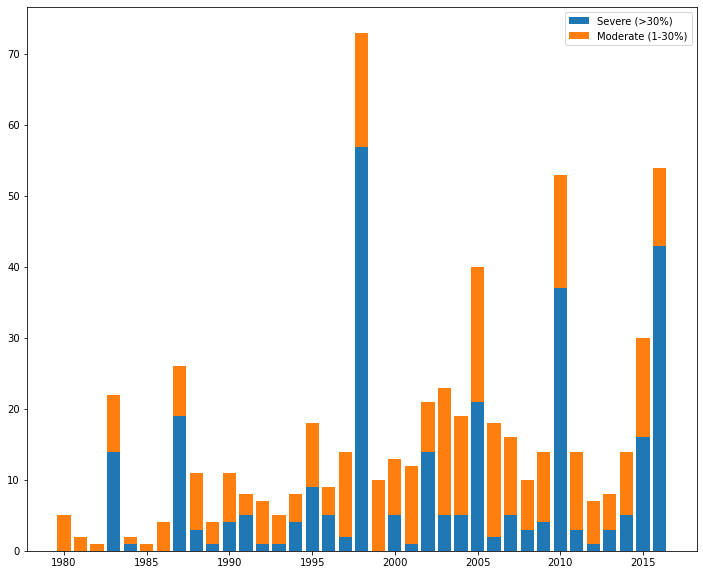

In [3]:
#Plotting severe and moderate bleaching events worldwide. 
plt.figure(figsize=(12,10))

plt.bar(world_events.Year, world_events.Severe_bleaching,
label='Severe (>30%)')
plt.bar(world_events.Year, world_events.Moderate_bleaching,
bottom=world_events.Severe_bleaching,
label='Moderate (1-30%)')

plt.legend()

In [4]:
#Importing bleaching events cause by ENSO Cycle - El Nino Southern Oscillation (bee = bleaching events el nino)
bee = pd.read_csv('bleaching-events-enso.csv')
bee.head()

,Entity,Code,Year,Total bleaching events
0,El Nino,NaN,1980,0
1,El Nino,NaN,1981,0
2,El Nino,NaN,1982,1
3,El Nino,NaN,1983,22
4,El Nino,NaN,1984,0


<AxesSubplot:xlabel='Year', ylabel='Total bleaching events'>

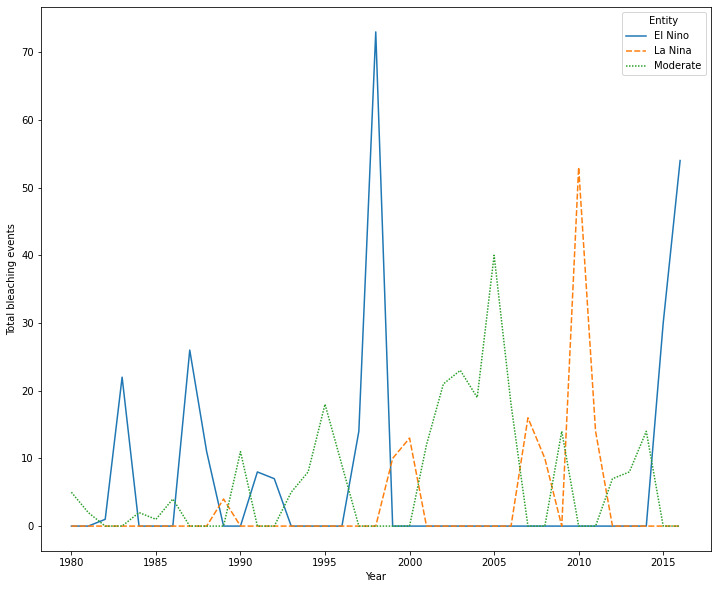

In [5]:
#plotting bleaching events caused by ENSO cycle
plt.figure(figsize=(12,10))
sns.lineplot(data=bee, x="Year", y="Total bleaching events", hue="Entity", style="Entity")

In [6]:
#Importing SEVERE bleaching events caused by ENSO cycle - (sbee = severe bleaching events el nino)
#also renamed columns to get rid of greater than sign and perc sign for cleaner object names
sbee = pd.read_csv('severe-bleaching-events-enso.csv')
sbee = sbee.rename(columns={'Severe bleaching events (>30% bleached)': 'Severe_bleaching'})
sbee.head()

,Entity,Code,Year,Severe_bleaching
0,El Nino,NaN,1980,0
1,El Nino,NaN,1981,0
2,El Nino,NaN,1982,0
3,El Nino,NaN,1983,14
4,El Nino,NaN,1984,0


<AxesSubplot:xlabel='Year', ylabel='Severe_bleaching'>

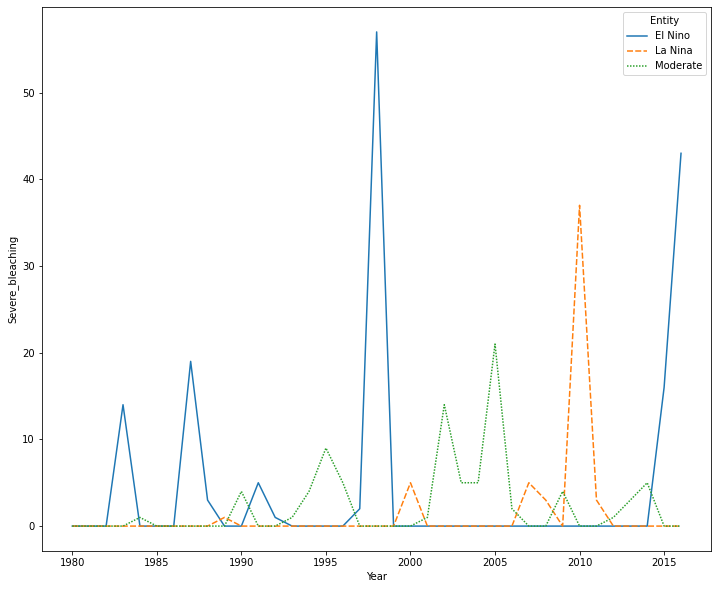

In [7]:
#plotting SEVERE bleaching events caused by ENSO cycle
plt.figure(figsize=(12,10))
sns.lineplot(data=sbee, x="Year", y="Severe_bleaching", hue="Entity", style="Entity")

GLOBAL WARMING DATA

This graph shows how the average surface temperature of the world’s oceans has changed since 1880. This graph uses the 1971 to 2000 average as a baseline for depicting change. Choosing a different baseline period would not change the shape of the data over time. The shaded band shows the range of uncertainty in the data, based on the number of measurements collected and the precision of the methods used.

In [8]:
#Importing sea surface temp data .. reference is USEPA
sea_surf_temp = pd.read_csv('sea-surface-temp.csv')
sea_surf_temp.columns = ['year', 'annual anomaly', 'lower 95_perc confidence interval', 'upper 95_perc confidence level']
sea_surf_temp.head()

,year,annual anomaly,lower 95_perc confidence interval,upper 95_perc confidence level
0,1880,-0.211848,-0.420,-0.628152
1,1881,-0.128904,-0.330,-0.531096
2,1882,-0.150432,-0.348,-0.545568
3,1883,-0.261960,-0.456,-0.650040
4,1884,-0.373848,-0.582,-0.790152


<AxesSubplot:xlabel='year'>

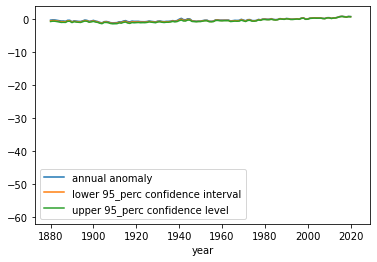

In [10]:
#plotting sea surface temperature across years
sea_surf_temp.plot(x='year', y =['annual anomaly', 'lower 95_perc confidence interval', 'upper 95_perc confidence level'])

In [50]:
#Importing Ocean Heat DF. Different agencies results, US, JAPAN, AUSTRALIA, CHINA
ocean_heat = pd.read_csv('ocean-heat.csv')
ocean_heat.head()

,Year,CSIRO,IAP,MRI/JMA,NOAA
0,1955,NaN,-7.567433,-9.497333,-3.437233
1,1956,NaN,-6.933433,-7.897333,-2.844233
2,1957,NaN,-6.810433,-8.947333,-4.849233
3,1958,NaN,-2.275433,-5.707333,-1.769233
4,1959,NaN,-5.154433,-7.347333,-2.425233


In [48]:
#Importing Ocean acidity .. need to filter info for only pacific ocean as it's the only relevant info here.. 
sea_acid = pd.read_csv('ocean-acidity.csv')
sea_acid.head()

,Hawaii Year,Hawaii pH,Hawaii pCO2,Unnamed: 3,Canary Islands Year,Canary Islands pH,Canary Islands pCO2,Unnamed: 7,Bermuda Year,Bermuda pH,Bermuda pCO2,Unnamed: 11,Cariaco Year (pH),Cariaco pH,Cariaco Year (pCO2),Cariaco pCO2
0,1988.833333,8.1097,330.9,NaN,1995.7507,8.0765,377.6526,NaN,1983.6959,8.070,363.187,NaN,1995.950685,8.0597,1995.950685,400.925986
1,1988.920765,8.1092,330.6,NaN,1995.7562,8.0743,380.0385,NaN,1983.7726,8.088,343.941,NaN,1996.032787,8.0603,1996.032787,388.131890
2,1989.021918,8.1168,324.3,NaN,1995.7644,8.0713,383.1138,NaN,1984.0712,8.146,299.199,NaN,1996.120219,8.0690,1996.120219,375.392151
3,1989.156164,8.1316,310.9,NaN,1995.9014,8.0837,370.4347,NaN,1984.1836,8.145,301.419,NaN,1996.292350,7.9921,1996.292350,443.365629
4,1989.235616,8.1218,317.7,NaN,1996.0656,8.1117,343.0605,NaN,1984.3260,8.144,302.309,NaN,1996.355191,8.0482,1996.355191,381.591860


WILDLIFE/ECOSYSTEMS/EXTENCTION THREAT

In [30]:
#total number of DESCRIBED SPECIES, really only using to show how relevant coral is among other living things
species_tot = pd.read_csv('number-of-described-species.csv')
species_tot.head()

,Entity,Code,Year,Number of described species
0,All groups,NaN,2020,2115985
1,Amphibians,NaN,2020,8250
2,Arachnids,NaN,2020,110615
3,Birds,NaN,2020,11158
4,Brown Algae,NaN,2020,4326


In [31]:
#total number of THREATENED SPECIES. explain why they are threated.. look into this further on OUR WORLD.
species_threat = pd.read_csv('number-species-threatened.csv')
species_threat.head()

,Entity,Code,Year,Number of threatened species
0,All groups,NaN,2020,35765
1,Amphibians,NaN,2020,2390
2,Arachnids,NaN,2020,203
3,Birds,NaN,2020,1481
4,Brown Algae,NaN,2020,6


In [33]:
#total number of FISH THREATENED 
fish_threat = pd.read_csv('fish-species-threatened.csv')
fish_threat.head()

,Entity,Code,Year,"Fish species, threatened"
0,Afghanistan,AFG,2017,5
1,Albania,ALB,2017,44
2,Algeria,DZA,2017,40
3,American Samoa,ASM,2017,12
4,Andorra,AND,2017,0


POLLUTION

In [29]:
#importing GLOBAL CARBON BUDGET DF, per country .. try filtering specific years here to clean up a little bit
#years ranging are way too massive, find a range that coincides with other DF's to tell a story.
gcb = pd.read_csv('GCB2020v18_MtCO2_flat.csv')
filt = gcb[gcb['Year'] == 2017]
filt

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
267,Afghanistan,AFG,2017,6.859825,3.447824,3.066768,0.300448,0.044785,0.000000,NaN,0.188996
537,Albania,ALB,2017,5.404400,0.439680,4.100016,0.084272,0.780432,0.000000,NaN,1.873815
807,Algeria,DZA,2017,153.448361,0.795088,55.374032,82.352064,9.156377,5.770800,NaN,3.707450
1077,Andorra,AND,2017,0.465328,0.000000,0.465328,0.000000,0.000000,0.000000,NaN,6.043142
1347,Angola,AGO,2017,37.470836,0.000000,20.126352,1.571856,1.937364,13.835264,NaN,1.256704
...,...,...,...,...,...,...,...,...,...,...,...
59937,Wallis and Futuna Islands,WLF,2017,0.025648,0.000000,0.025648,0.000000,0.000000,0.000000,NaN,2.155294
60207,Yemen,YEM,2017,10.107076,0.337088,7.749360,1.183472,0.837156,0.000000,NaN,0.363109
60477,Zambia,ZMB,2017,6.519623,1.901616,3.572400,0.000000,1.045607,0.000000,NaN,0.386839
60747,Zimbabwe,ZWE,2017,10.246841,6.382688,3.282944,0.000000,0.581209,0.000000,NaN,0.719754


In [35]:
#importing global plastics PRODUCTION
plastics = pd.read_csv('global-plastics-production.csv')
plastics.head()

,Entity,Code,Year,Global plastics production (million tonnes)
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000


In [44]:
#attempting to add geojson for global carbon budget.
